## Runge-Kutta method

The idea is to approximate higher-order Taylor methods with parametric combination of the vector field

Consider the IVP 

\begin{align*}
\dfrac{dy}{dt} & = f(t, y), \quad \quad t \in [a,b] \\
y(a) & = \alpha
\end{align*}

We need to determine values $a_1, \alpha_1$, and $\beta_1$ with the property that $a_1 f(t + \alpha_1, y + \beta_1)$ approximates

$$
T^{(2)} = f(t, y) + \dfrac{h}{2} f^{\prime}(t, y). 
$$

Note that

$$
f^{\prime}(t,y) = \dfrac{\partial}{\partial t} f(t,y) + \dfrac{\partial}{\partial y} f(t,y) \cdot y^{\prime}(t)
$$

Hence

$$
T^{(2)}(t,y) = f(t, y) + \dfrac{h}{2} \dfrac{\partial}{\partial t} f(t,y) + \dfrac{h}{2} \dfrac{\partial}{\partial y} f(t,y) \cdot f(t,y)
$$

Using Taylor's theorem to expand $f(t + \alpha_1, y + \beta_1)$ and setting the coefficients of $f$ and it's partial derivatives equal, we arrive at

$$
T^{(2)}(t,y) = f(t + \dfrac{h}{2}, y + \dfrac{h}{2}f(t,y)) - R_1(t + \dfrac{h}{2}, y + \dfrac{h}{2}f(t,y))
$$

Where $R_1$ is an error term of $\mathcal{O}(h^2)$.

### Midpoint method

\begin{align*}
w_0 & = \alpha \\
w_{i+1} & = w_{i} + \dfrac{h}{2}\left[ f(t_i, w_i) + f(t_i + h, w_i + h f(t_i, w_i)) \right]
\end{align*}

### Higher order Runge-Kutta methods

The most common higher-order Runge-Kutta method is of order $4$ with difference equations:

\begin{align*}
w_0 & = \alpha \\
k_1 & = h f(t_i, w_i)\\
k_2 & = f(t_i + \dfrac{h}{2}, w_i + \dfrac{1}{2} k_1) \\
k_3 & = f(t_i + \dfrac{h}{2}, w_i + \dfrac{1}{2} k_2) \\
k_4 & = h f(t_i + h, w_i + k_3) \\
w_{i+1} & = w_i + \dfrac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}


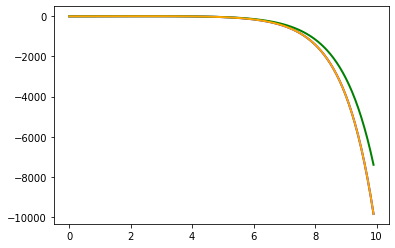

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def RungeKutta4(a, b, alpha, n, f):
    h = (b - a) / n
    t = np.zeros(n)
    w = np.zeros(n)
    w[0] = alpha
    t[0] = a
    
    for i in range(1, n):
        k1 = h * f(t[i-1], w[i-1])
        k2 = h * f(t[i-1]+h/2, w[i-1] + 0.5*k1)
        k3 = h * f(t[i-1]+h/2, w[i-1] + 0.5*k2)
        k4 = h * f(t[i-1]+h, w[i-1] + k3)
        
        k = 1/6 * (k1 + 2*k2 + 2*k3 + k4 )
        
        w[i] = w[i-1] + k
        
        t[i] = a + i * h
    return t, w


def euler(a, b, alpha, n, f):
    h = (b-a) / n
    t = np.zeros(n)
    w = np.zeros(n)
    t[0] = a
    w[0] = alpha
    
    for i in range(1,n):
        t[i] = a + i * h
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
    
    
    return t, w

def f(t, y):
    return y - t ** 2 + 1

def y(t):
    return (t+1)**2 - 0.5 * np.exp(t)

a = 0
b = 10
alpha = 0.5
n = 100

t1, w1 = euler(a, b, alpha, n, f)
t2, w2 = RungeKutta4(a, b, alpha, n, f)
y_exact = y(t1) 

fig, ax = plt.subplots() 
    
    
ax.plot(t1, y_exact, color = 'blue', lw = 2, ls = '-')
ax.plot(t1, w1, color = 'green', lw = 2, ls = '-')
ax.plot(t2, w2, color = 'orange', lw = 2, ls = '-')
#ax.plot(t1, w1, color = "red", marker = 'o', ls = '')

In [6]:
def RungeKutta4MultiD(a, b, alpha, n, f):
    h = (b - a) / n
    t = np.zeros(n+1)
    w = np.zeros((len(alpha), n+1))
    w[:,0] = alpha
    t[0] = a
    
    for i in range(1, n+1):
        k1 = h * f(t[i-1], w[:,i-1])
        k2 = h * f(t[i-1]+h/2, w[:,i-1] + 0.5*k1)
        k3 = h * f(t[i-1]+h/2, w[:,i-1] + 0.5*k2)
        k4 = h * f(t[i-1]+h, w[:,i-1] + k3)
        
        k = 1/6.0 * (k1 + 2*k2 + 2*k3 + k4 )
        
        w[:,i] = w[:,i-1] + k
        
        t[i] = a + i * h
    return t, w


def lorenz(t, x):
    s = 10
    r = 28
    b = 8/3
    
    dx_dt = s*(x[1] - x[0])
    dy_dt = r*x[0] - x[1] - x[0]*x[2]
    dz_dt = x[0]*x[1] - b*x[2]
     
    w = np.array([dx_dt, dy_dt, dz_dt])
    
    return w


def rossler(t, x):
    a = 0.2
    b = 0.2
    c = 4.7

    dx = -(x[1] + x[2])
    dy = x[0] + a*x[1]
    dz = b + x[2]*(x[0]-c)
    w = np.array([dx, dy, dz])
    
    return w


a = 0
b = 50
alpha = np.array([0.12, 0.2, 0.1])

n = 10000

t, w1 = RungeKutta4MultiD(a, b, alpha, n, lorenz)
t, w2 = RungeKutta4MultiD(a, b, alpha, n, lorenz)

Text(0.5, 0.92, 'Predictions along the attractor')

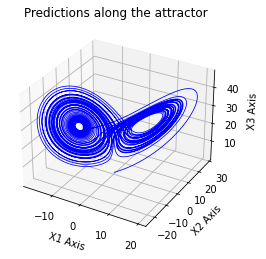

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

#norm = mpl.colors.Normalize(-abs(Z1).max(), abs(Z1).max())

fig, ax = plt.subplots(figsize = (14, 4), subplot_kw = {'projection': '3d'})

#fig = plt.figure()
#ax = fig.gca(projection='3d')

ax.plot(w1[0,:], w1[1,:], w1[2,:], lw=0.8,color='b')
#ax.plot(w2[0,:], w2[1,:], w2[2,:], lw=0.8,color='r')
#ax.plot(w1[0,:], w1[1,:], w1[2,:], lw=0.8, color='r')
ax.set_xlabel("X1 Axis")
ax.set_ylabel("X2 Axis")
ax.set_zlabel("X3 Axis")
ax.set_title("Predictions along the attractor")

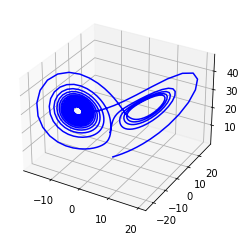

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


fig, ax = plt.subplots(subplot_kw = {'projection': '3d'})

ax.plot(w[0,:], w[1,:], w[2,:], color='b')
